# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [ ]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

In [ ]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [ ]:
#df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [13]:
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [14]:
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')

In [15]:
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')

In [16]:
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [17]:
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

In [ ]:
#df = pd.get_dummies(df)

In [ ]:
#df = pd.get_dummies(df, columns=
#               ['EDUCATION', 'MARITAL_STATUS', 
#                'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 
#                'FACT_ADDRESS_PROVINCE', 
#                'POSTAL_ADDRESS_PROVINCE', 'REGION_NM', 
#                'sample']
#              )

In [ ]:
#list(df.columns.values)

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

не хватает данных тут:

REGION_NM                     30131 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
TP_PROVINCE                   29543 non-null object
эти данные мы обработает с помощью df = pd.get_dummies(df)


WORK_TIME                     27416 non-null float64
PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64

для PREVIOUS_CARD_NUM_UTILIZED там где nan сделаем 0
в случае WORK_TIME подставим среднюю

но сделаем это позже.
###df = df.drop(['PREVIOUS_CARD_NUM_UTILIZED'], axis=1)
#df["WORK_TIME"].median()
48.0
#df['WORK_TIME'] = df['WORK_TIME'].fillna(48)
#df.info(verbose=True, null_counts=True) ##будет видно все данные

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [19]:
# есть, позже приведем к адекватному виду
df.select_dtypes(exclude=['object']).join(pd.get_dummies(df.select_dtypes(include=['object'])))

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,...,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ,sample_test,sample_train
0,59909969,0,30,1,0,1,1,1,7000.0,0,...,0,0,0,0,0,0,0,0,1,0
1,59910420,0,48,0,1,1,0,0,4100.0,1,...,0,0,0,0,1,0,0,0,1,0
2,59911223,0,35,1,0,0,1,0,40000.0,1,...,0,0,0,0,0,1,0,0,1,0
3,59911322,0,22,1,0,0,0,0,20000.0,1,...,0,0,0,0,0,0,0,0,1,0
4,59911438,0,27,1,0,1,2,2,17000.0,1,...,0,0,0,0,0,0,0,0,1,0
5,59911769,0,44,0,1,0,2,2,7000.0,1,...,0,1,0,0,0,0,0,0,1,0
6,59912044,0,57,1,0,1,0,0,10000.0,1,...,0,0,0,1,0,0,0,0,1,0
7,59912382,0,33,1,0,1,2,2,7500.0,1,...,0,0,0,0,0,0,0,0,1,0
8,59912422,0,53,0,1,1,2,0,9000.0,1,...,0,0,0,0,0,0,0,0,1,0
9,59912485,1,33,1,0,0,1,0,4000.0,1,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
#df.corr()

In [ ]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(df, alpha=1, figsize=(10, 10))

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [41]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    # delete AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    #float to int
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].astype('int64')
    df_output['CREDIT'] = df_output['CREDIT'].astype('int64')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].astype('int64')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].astype('int64')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].astype('int64')
    
    #work time fill
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(df_output["WORK_TIME"].median()).astype('int64')
    
    #prev card
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0).astype('int64')
    
    # category code
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 
                                                   'GEN_INDUSTRY', 'GEN_TITLE', 
                                                   'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 
                                                   'JOB_DIR', 'FAMILY_INCOME', 
                                                   'REG_ADDRESS_PROVINCE', 
                                                   'FACT_ADDRESS_PROVINCE', 
                                                   'POSTAL_ADDRESS_PROVINCE', 
                                                   'TP_PROVINCE', 'REGION_NM'])
        
    return df_output

In [42]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [43]:
df_preproc.head(5).T

,0,1,2,3,4
TARGET,0,0,0,0,0
AGE,30,48,35,22,27
SOCSTATUS_WORK_FL,1,0,1,1,1
SOCSTATUS_PENS_FL,0,1,0,0,0
GENDER,1,1,0,0,1
CHILD_TOTAL,1,0,1,0,2
DEPENDANTS,1,0,0,0,2
PERSONAL_INCOME,7000,4100,40000,20000,17000
REG_FACT_FL,0,1,1,1,1
FACT_POST_FL,1,1,1,1,1


In [44]:
df_preproc.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 444 columns):
TARGET                                                    30133 non-null int64
AGE                                                       30133 non-null int64
SOCSTATUS_WORK_FL                                         30133 non-null int64
SOCSTATUS_PENS_FL                                         30133 non-null int64
GENDER                                                    30133 non-null int64
CHILD_TOTAL                                               30133 non-null int64
DEPENDANTS                                                30133 non-null int64
PERSONAL_INCOME                                           30133 non-null int64
REG_FACT_FL                                               30133 non-null int64
FACT_POST_FL                                              30133 non-null int64
REG_POST_FL                                               30133 non-null int64
REG_FACT_POST_FL     

In [95]:
df_train_preproc.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Data columns (total 443 columns):
TARGET                                                    15223 non-null int64
AGE                                                       15223 non-null int64
SOCSTATUS_WORK_FL                                         15223 non-null int64
SOCSTATUS_PENS_FL                                         15223 non-null int64
GENDER                                                    15223 non-null int64
CHILD_TOTAL                                               15223 non-null int64
DEPENDANTS                                                15223 non-null int64
PERSONAL_INCOME                                           15223 non-null int64
REG_FACT_FL                                               15223 non-null int64
FACT_POST_FL                                              15223 non-null int64
REG_POST_FL                                               15223 non-null int64
REG_FACT_POST_FL 

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [212]:
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)

y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

In [213]:
#print(X.shape, X_test.shape, y.shape, y_test.shape)

#### Задание 5. Обучение и оценка качества разных моделей

In [214]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train_, X_test_, y_train_, y_test_ = train_test_split(
    X,
    y,
    test_size=0.3, random_state=42)



In [352]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold

## Your Code Here

In [230]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_, y_train_)
predict_dtc = dtc.predict(X_test_)
predict_proba_dtc = dtc.predict_proba(X_test_)

acc_dtc = accuracy_score(y_test_, predict_dtc)
pre_dtc = precision_score(y_test_, predict_dtc)
rec_dtc = recall_score(y_test_, predict_dtc)
roc_auc_dtc = roc_auc_score(y_test_, predict_proba_dtc[:,1])

print("Accuracy: ", acc_dtc,
      "\nPrecision: ", pre_dtc,
      "\nRecall: ", rec_dtc,
      "\nROC AUC:", roc_auc_dtc
)


Accuracy:  0.8053426757171009 
Precision:  0.17254901960784313 
Recall:  0.15855855855855855 
ROC AUC: 0.5266870559492693


In [229]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_, y_train_)
predict_rfc = rfc.predict(X_test_)
predict_proba_rfc = rfc.predict_proba(X_test_)

acc_rfc = accuracy_score(y_test_, predict_rfc)
pre_rfc = precision_score(y_test_, predict_rfc)
rec_rfc = recall_score(y_test_, predict_rfc)
roc_auc_rfc = roc_auc_score(y_test_, predict_proba_rfc[:,1])

print("Accuracy: ", acc_rfc,
      "\nPrecision: ", pre_rfc,
      "\nRecall: ", rec_rfc,
      "\nROC AUC:", roc_auc_rfc
)

Accuracy:  0.877162250930589 
Precision:  0.3125 
Recall:  0.009009009009009009 
ROC AUC: 0.5919581346051934


In [228]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_, y_train_)
predict_lr = lr.predict(X_test_)
predict_proba_lr = lr.predict_proba(X_test_)

acc_lr = accuracy_score(y_test_, predict_lr)
pre_lr = precision_score(y_test_, predict_lr)
rec_lr = recall_score(y_test_, predict_lr)
roc_auc_lr = roc_auc_score(y_test_, predict_proba_lr[:,1])


print("Accuracy: ", acc_lr,
      "\nPrecision: ", pre_lr,
      "\nRecall: ", rec_lr,
      "\nROC AUC:", roc_auc_lr
)

Accuracy:  0.8780380994088023 
Precision:  0.3333333333333333 
Recall:  0.0036036036036036037 
ROC AUC: 0.6447571699316466


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [109]:
# Посчитать метрики стандартные
# accuracy, precision, recall

#from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

выполнено выше

In [ ]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

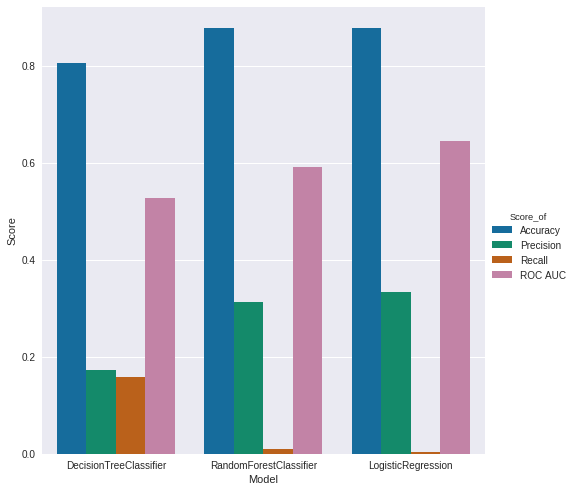

In [340]:
st = pd.DataFrame(
    [
        ['Accuracy', 'DecisionTreeClassifier', acc_dtc],
        ['Accuracy', 'RandomForestClassifier', acc_rfc],
        ['Accuracy', 'LogisticRegression', acc_lr],
        ['Precision', 'DecisionTreeClassifier', pre_dtc],
        ['Precision', 'RandomForestClassifier', pre_rfc],
        ['Precision', 'LogisticRegression', pre_lr],
        ['Recall', 'DecisionTreeClassifier', rec_dtc],
        ['Recall', 'RandomForestClassifier', rec_rfc],
        ['Recall', 'LogisticRegression', rec_lr],
        ['ROC AUC', 'DecisionTreeClassifier', roc_auc_dtc],
        ['ROC AUC', 'RandomForestClassifier', roc_auc_rfc],
        ['ROC AUC', 'LogisticRegression', roc_auc_lr]
    ],
    columns=['Score_of', 'Model', 'Score']
             )
#DecisionTreeClassifier
#RandomForestClassifier
#LogisticRegression

sns.set(style="darkgrid")
sns.factorplot(x='Model', y='Score', hue='Score_of', data=st, kind='bar', size=7, palette="colorblind")


In [ ]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
## вывел roc_auc_score выше вместе с обычной статистикой и ниже

## Your Code Here

(-0.01, 1.01)

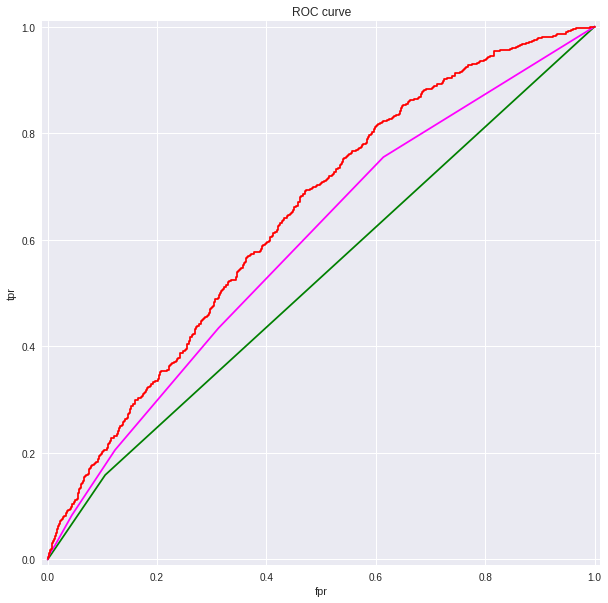

In [355]:
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test_, predict_proba_dtc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test_, predict_proba_rfc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_, predict_proba_lr[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr_dtc, tpr_dtc, color='green')
plt.plot(fpr_rfc, tpr_rfc, color='magenta')
plt.plot(fpr_lr, tpr_lr, color='red')
#plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr') 
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [374]:
print("DecisionTreeClassifier ROC AUC:", roc_auc_dtc,
      "\nRandomForestClassifier ROC AUC:", roc_auc_rfc,
      "\nLogisticRegression ROC AUC:", roc_auc_lr
     )

DecisionTreeClassifier ROC AUC: 0.5266870559492693 
RandomForestClassifier ROC AUC: 0.5919581346051934 
LogisticRegression ROC AUC: 0.6447571699316466


In [398]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here

In [402]:

dtc = DecisionTreeClassifier()
dtc_kfold = cross_val_score(
    dtc,
    X_train_,
    y_train_,
    scoring='roc_auc',
    cv = cv.split(X_train_, y_train_)
).mean()

rfc = RandomForestClassifier()
rfc_kfold = cross_val_score(
    rfc,
    X_train_,
    y_train_,
    scoring='roc_auc',
    cv = cv.split(X_train_, y_train_)
).mean()

lr_kfold = cross_val_score(
    lr,
    X_train_,
    y_train_,
    scoring='roc_auc',
    cv = cv.split(X_train_, y_train_)
).mean()

print("dtc_kfold: ", dtc_kfold,
      "\nrfc_kfold: ", rfc_kfold,
      "\nlr_kfold: ", lr_kfold
     )


dtc_kfold:  0.5338075294051638 
rfc_kfold:  0.5798922769701541 
lr_kfold:  0.6283052537729569


In [403]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
lr_real = LogisticRegression()
lr_real.fit(X, y)
lr_real_predict_proba = lr_real.predict_proba(X_test)

## Your Code Here


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [407]:
# Померить roc_auc на тесте
roc_auc_score(y_test, lr_real_predict_proba[:,1])

0.6301148719062094

In [408]:
dtc_real = DecisionTreeClassifier()
dtc_real.fit(X, y)
dtc_real_predict_proba = dtc_real.predict_proba(X_test)
roc_auc_score(y_test, dtc_real_predict_proba[:,1])

0.5305881458966565

In [409]:
rfc_real = DecisionTreeClassifier()
rfc_real.fit(X, y)
rfc_real_predict_proba = rfc_real.predict_proba(X_test)
roc_auc_score(y_test, rfc_real_predict_proba[:,1])

0.5262492401215805